<a href="https://colab.research.google.com/github/NehaPatidar208/fastai_projects/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

Creating data

In [2]:
path= untar_data(URLs.MNIST)

In [0]:
data= ImageDataBunch.from_folder(path,train='training',valid='testing',size=32)

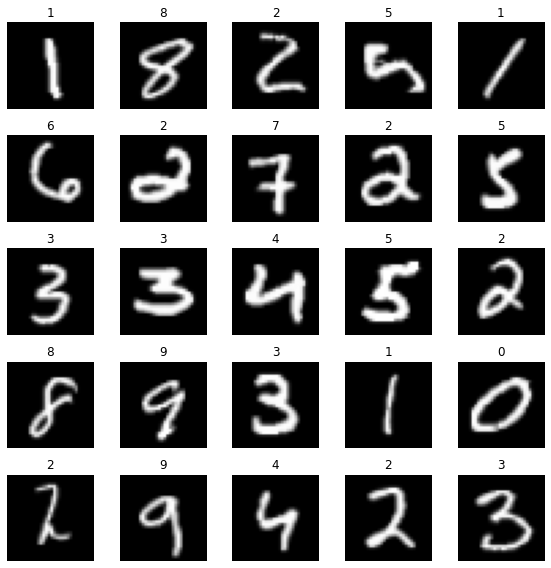

In [7]:
data.show_batch(row=5, figsize=(8,8))

In [8]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Traingin the Resnet34**

In [9]:
model_34=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
model_34.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.471086,0.284932,0.086400,01:01
1,0.200087,0.123165,0.037100,00:59
2,0.155294,0.099349,0.031800,00:59


In [0]:
model_34.save("stage-1-resnet34")

***Interpretation from classifier***

In [13]:
interpt=ClassificationInterpretation.from_learner(model_34)

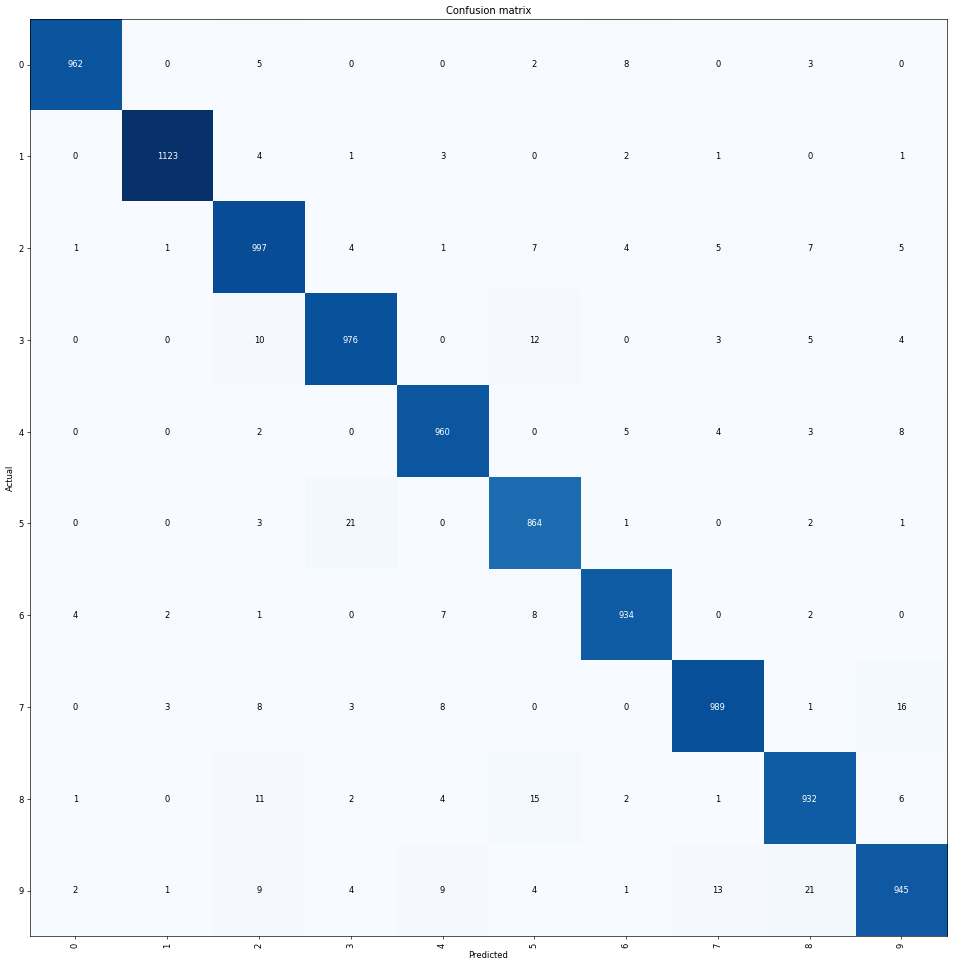

In [14]:
interpt.plot_confusion_matrix(figsize=(16,16),dpi=60)

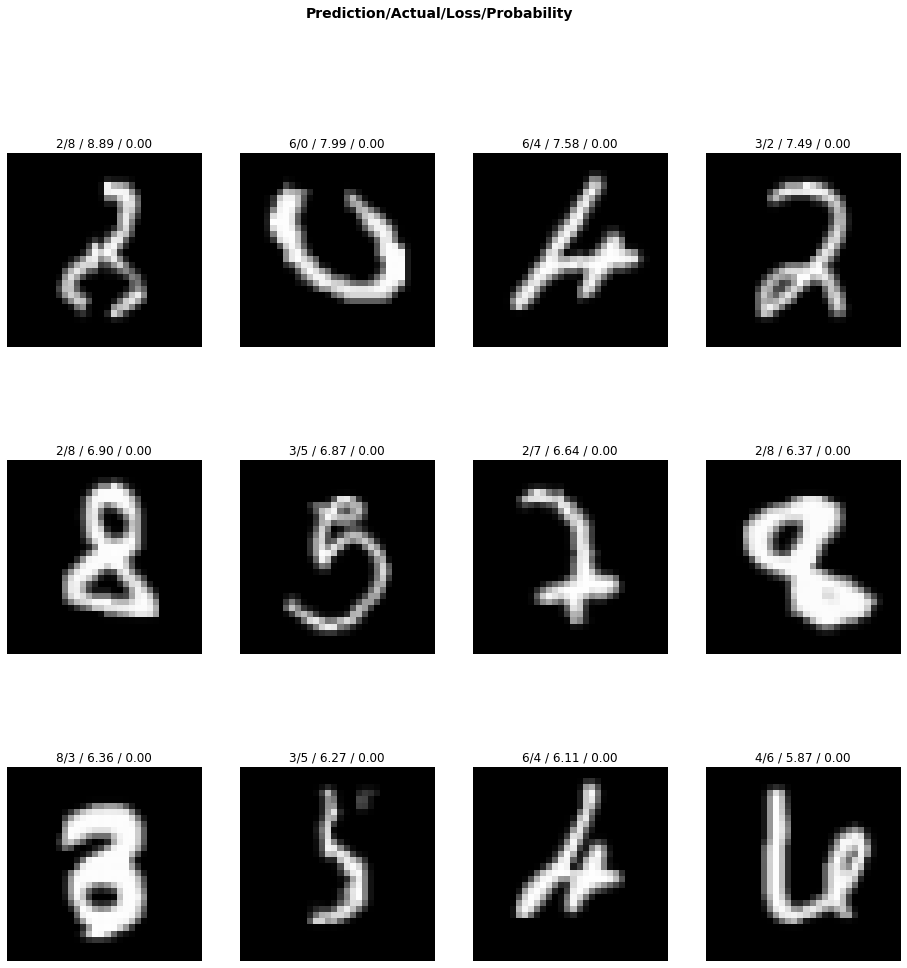

In [16]:
interpt.plot_top_losses(12,figsize=(16,16))

In [18]:
interpt.most_confused(min_val=2)

[('5', '3', 21),
 ('9', '8', 21),
 ('7', '9', 16),
 ('8', '5', 15),
 ('9', '7', 13),
 ('3', '5', 12),
 ('8', '2', 11),
 ('3', '2', 10),
 ('9', '2', 9),
 ('9', '4', 9),
 ('0', '6', 8),
 ('4', '9', 8),
 ('6', '5', 8),
 ('7', '2', 8),
 ('7', '4', 8),
 ('2', '5', 7),
 ('2', '8', 7),
 ('6', '4', 7),
 ('8', '9', 6),
 ('0', '2', 5),
 ('2', '7', 5),
 ('2', '9', 5),
 ('3', '8', 5),
 ('4', '6', 5),
 ('1', '2', 4),
 ('2', '3', 4),
 ('2', '6', 4),
 ('3', '9', 4),
 ('4', '7', 4),
 ('6', '0', 4),
 ('8', '4', 4),
 ('9', '3', 4),
 ('9', '5', 4),
 ('0', '8', 3),
 ('1', '4', 3),
 ('3', '7', 3),
 ('4', '8', 3),
 ('5', '2', 3),
 ('7', '1', 3),
 ('7', '3', 3),
 ('0', '5', 2),
 ('1', '6', 2),
 ('4', '2', 2),
 ('5', '8', 2),
 ('6', '1', 2),
 ('6', '8', 2),
 ('8', '3', 2),
 ('8', '6', 2),
 ('9', '0', 2)]

***Fine Tuning***

In [0]:
model_34.unfreeze()

In [20]:
model_34.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.092329,0.066588,0.018500,01:07
1,0.043452,0.021545,0.007100,01:07
2,0.011217,0.013575,0.003800,01:08


In [21]:
model_34.load("stage-1-resnet34")

model_34.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


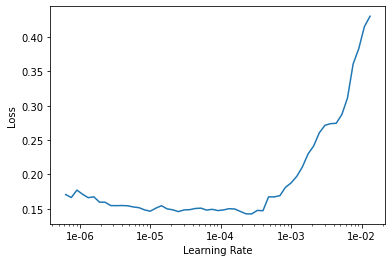

In [22]:
model_34.recorder.plot()

In [23]:
model_34.fit_one_cycle(3,max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.082468,0.032870,0.009900,01:07
1,0.033167,0.020578,0.005900,01:08
2,0.013447,0.015848,0.005700,01:07


so, here error rate is 0.005 which can considerable